# Theoretical Questions


1. What is unsupervised learning in the context of machine learning?
- Unsupervised learning is a type of machine learning where the model identifies patterns and structures in data without labeled responses or outcomes.

2. How does K-Means clustering algorithm work?
- K-Means partitions data into K clusters by initializing centroids, assigning points to the nearest centroid, and updating centroids as the mean of assigned points, iteratively.

3. Explain the concept of a dendrogram in hierarchical clustering?
- A dendrogram is a tree-like diagram that shows the merging or splitting of clusters at each step of hierarchical clustering.

4. What is the main difference between K-Means and Hierarchical Clustering?
- K-Means requires a predefined number of clusters; hierarchical clustering builds a nested tree without requiring the number of clusters in advance.

5. What are the advantages of DBSCAN over K-Means?
- DBSCAN can find arbitrarily shaped clusters, handles noise, and doesn’t require specifying the number of clusters.

6. When would you use Silhouette Score in clustering?
- To evaluate how well-separated and cohesive clusters are; higher scores indicate better clustering.

7. What are the limitations of Hierarchical Clustering?
- It’s computationally expensive, not scalable for large datasets, and once clusters are merged or split, they can’t be undone.

8. Why is feature scaling important in clustering algorithms like K-Means?
- Because distance metrics (like Euclidean distance) are sensitive to feature magnitudes; scaling ensures all features contribute equally.

9. How does DBSCAN identify noise points?
- Points that don’t have enough neighbors within a radius (eps) are marked as noise or outliers.


10. Define inertia in the context of K-Means?
- Inertia is the sum of squared distances between data points and their cluster centroids; lower inertia means tighter clusters.

11. What is the elbow method in K-Means clustering?
- A method to choose the optimal K by plotting inertia vs. K and looking for the “elbow” point where decreasing inertia slows down.

12. Describe the concept of "density" in DBSCAN?
- Density is defined by the number of points within a specified radius (eps); high-density regions form clusters.

13. Can hierarchical clustering be used on categorical data?
- Yes, using appropriate distance measures (e.g., Hamming distance) and linkage methods tailored for categorical variables.

14. What does a negative Silhouette Score indicate?
- It suggests that a sample is likely assigned to the wrong cluster, as it’s closer to a neighboring cluster than its own.

15. Explain the term "linkage criteria" in hierarchical clustering?
- It defines how distances between clusters are calculated (e.g., single, complete, average linkage).

16. Why might K-Means clustering perform poorly on data with varying cluster sizes or densities?
- K-Means assumes spherical, equally sized clusters and struggles when clusters have different densities or shapes.

17. What are the core parameters in DBSCAN, and how do they influence clustering?
- eps (radius) and min_samples (minimum points to form a dense region); they control cluster density sensitivity and noise detection.

18. How does K-Means++ improve upon standard K-Means initialization?
- It smartly selects initial centroids to be distant from each other, leading to better convergence and results.


19. What is agglomerative clustering?
- A bottom-up hierarchical clustering approach where each data point starts as its own cluster and merges iteratively.

20. What makes Silhouette Score a better metric than just inertia for model evaluation?
- Unlike inertia, Silhouette Score considers both intra-cluster cohesion and inter-cluster separation, giving a more holistic evaluation.



# Practical Questions:

21. Generate synthetic data with 4 centers using make_blobs and apply K-Means clustering. Visualize using a
scatter plot.

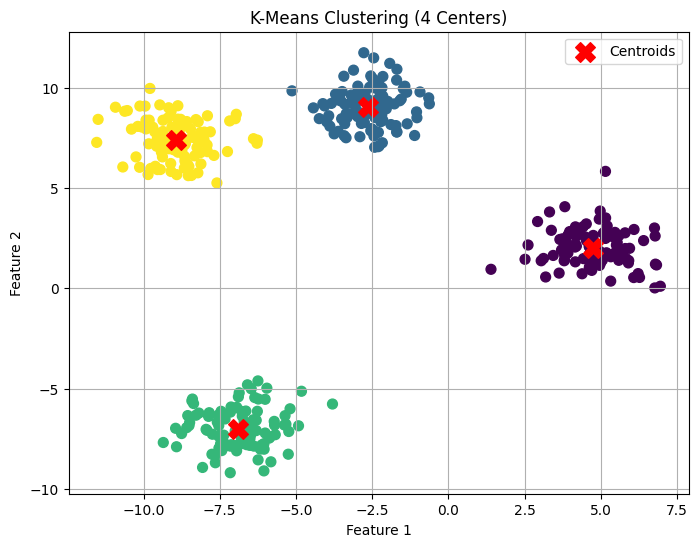

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Step 1: Generate Synthetic Data
X, y_true = make_blobs(n_samples=400, centers=4, cluster_std=1.0, random_state=42)

# Step 2: Apply K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Step 3: Visualize Clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, c='red', marker='X', label='Centroids')
plt.title("K-Means Clustering (4 Centers)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()


22. Load the Iris dataset and use Agglomerative Clustering to group the data into 3 clusters. Display the first 10
predicted labels.

In [ ]:
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering
import pandas as pd

# Step 1: Load Iris Dataset
iris = load_iris()
X = iris.data

# Step 2: Apply Agglomerative Clustering
agg_cluster = AgglomerativeClustering(n_clusters=3)
labels = agg_cluster.fit_predict(X)

# Step 3: Display First 10 Predicted Labels
print("First 10 Predicted Cluster Labels:")
print(labels[:10])


First 10 Predicted Cluster Labels:
[1 1 1 1 1 1 1 1 1 1]


23. Generate synthetic data using make_moons and apply DBSCAN. Highlight outliers in the plot.

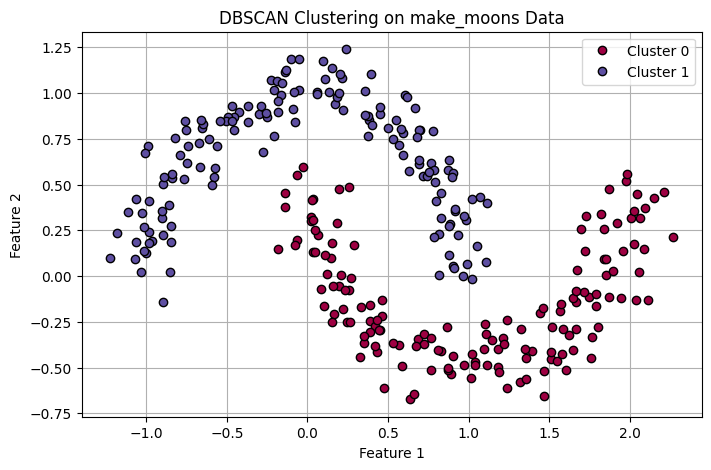

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

# Step 1: Generate synthetic data
X, y = make_moons(n_samples=300, noise=0.1, random_state=42)

# Step 2: Apply DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=5)
labels = dbscan.fit_predict(X)

# Step 3: Plotting
# Identify core points, border points, and noise
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]

plt.figure(figsize=(8, 5))

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)
    xy = X[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6 if k != -1 else 8, label=f'Cluster {k}' if k != -1 else 'Outlier')

plt.title('DBSCAN Clustering on make_moons Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()


24. Load the Wine dataset and apply K-Means clustering after standardizing the features. Print the size of each
cluster

In [2]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np

# Step 1: Load the Wine dataset
data = load_wine()
X = data.data

# Step 2: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(X_scaled)
labels = kmeans.labels_

# Step 4: Print the size of each cluster
unique, counts = np.unique(labels, return_counts=True)
print("Cluster sizes:")
for cluster_id, size in zip(unique, counts):
    print(f"Cluster {cluster_id}: {size} samples")


Cluster sizes:
Cluster 0: 65 samples
Cluster 1: 51 samples
Cluster 2: 62 samples


25. Use make_circles to generate synthetic data and cluster it using DBSCAN. Plot the result.

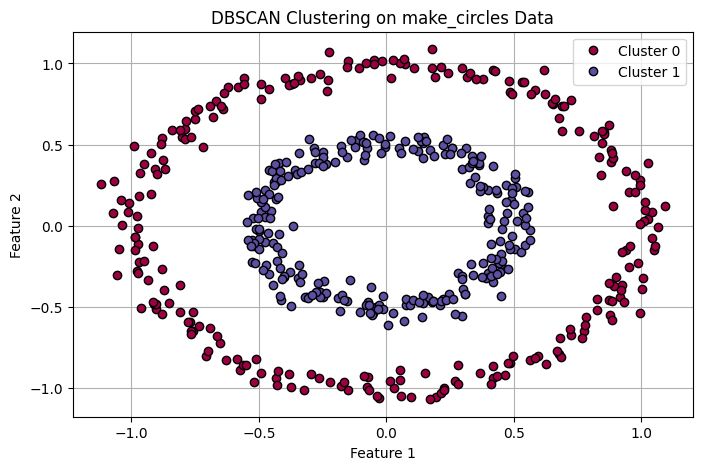

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.cluster import DBSCAN

# Step 1: Generate synthetic circular data
X, y = make_circles(n_samples=500, factor=0.5, noise=0.05, random_state=0)

# Step 2: Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.15, min_samples=5)
labels = dbscan.fit_predict(X)

# Step 3: Plotting the clusters and noise
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]

plt.figure(figsize=(8, 5))

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black for noise
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)
    xy = X[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6 if k != -1 else 8, label=f'Cluster {k}' if k != -1 else 'Outlier')

plt.title("DBSCAN Clustering on make_circles Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()


26. Load the Breast Cancer dataset, apply MinMaxScaler, and use K-Means with 2 clusters. Output the cluster
centroids.

In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import pandas as pd

# Step 1: Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
feature_names = data.feature_names

# Step 2: Apply MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Apply K-Means clustering with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans.fit(X_scaled)

# Step 4: Output the cluster centroids
centroids = kmeans.cluster_centers_

# Optional: Display centroids in a DataFrame for better readability
centroids_df = pd.DataFrame(centroids, columns=feature_names)
print("Cluster Centroids:")
print(centroids_df)


Cluster Centroids:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0     0.504836      0.395603        0.505787   0.363766         0.469887   
1     0.255354      0.288335        0.246964   0.143884         0.357431   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0          0.422263        0.418387              0.46928       0.458997   
1          0.180195        0.103448              0.13066       0.340118   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0                0.299459  ...      0.480474       0.451074         0.465530   
1                0.255916  ...      0.205241       0.320690         0.192421   

   worst area  worst smoothness  worst compactness  worst concavity  \
0    0.314606          0.498688           0.363915         0.390273   
1    0.099434          0.357112           0.148739         0.131423   

   worst concave points  worst symmetry  worst fractal dimension  
0   

27. Generate synthetic data using make_blobs with varying cluster standard deviations and cluster with
DBSCAN

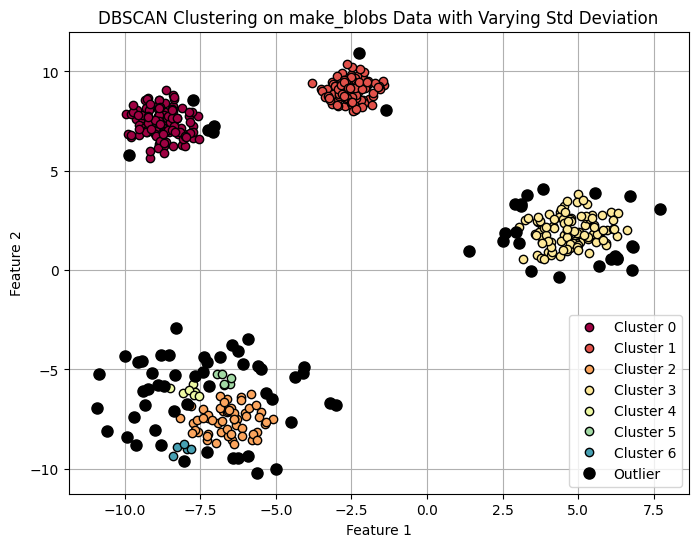

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN

# Step 1: Generate synthetic data with varying cluster std deviations
X, y = make_blobs(n_samples=500,
                  centers=4,
                  cluster_std=[0.5, 1.0, 1.5, 0.7],
                  random_state=42)

# Step 2: Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(X)

# Step 3: Plot the clusters and outliers
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]

plt.figure(figsize=(8, 6))

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black for noise
        col = [0, 0, 0, 1]

    class_mask = (labels == k)
    xy = X[class_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6 if k != -1 else 8, label=f'Cluster {k}' if k != -1 else 'Outlier')

plt.title("DBSCAN Clustering on make_blobs Data with Varying Std Deviation")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()


28.  Load the Digits dataset, reduce it to 2D using PCA, and visualize clusters from K-Means.

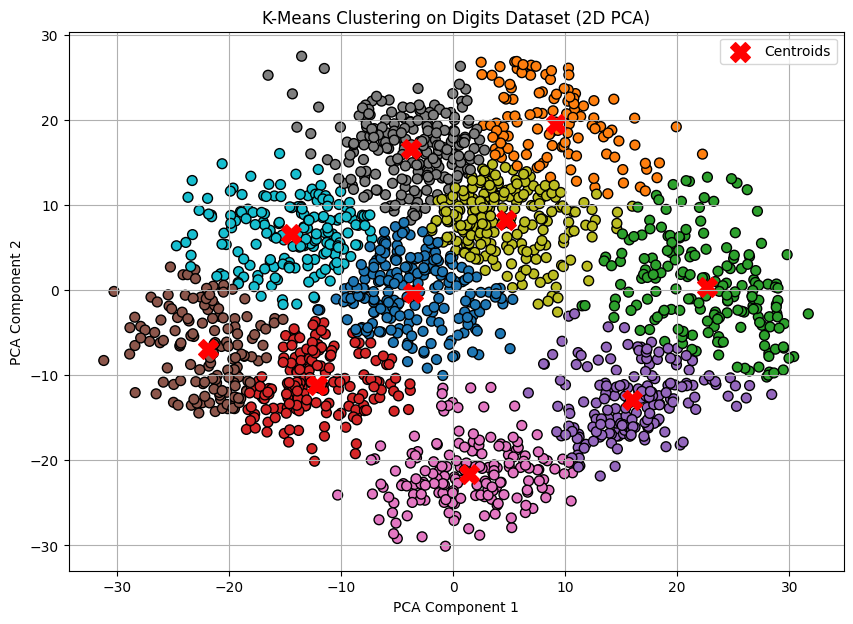

In [6]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Step 1: Load the Digits dataset
digits = load_digits()
X = digits.data
y = digits.target

# Step 2: Reduce to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Step 3: Apply K-Means clustering (10 clusters for digits 0-9)
kmeans = KMeans(n_clusters=10, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_pca)

# Step 4: Visualize the clusters
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='tab10', s=50, edgecolor='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, c='red', marker='X', label='Centroids')

plt.title("K-Means Clustering on Digits Dataset (2D PCA)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid(True)
plt.show()


29.  Create synthetic data using make_blobs and evaluate silhouette scores for k = 2 to 5. Display as a bar chart

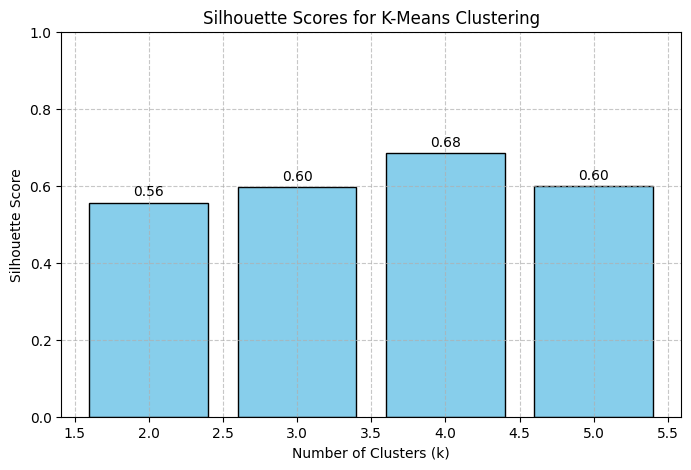

In [7]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Step 1: Create synthetic data
X, _ = make_blobs(n_samples=500, centers=4, cluster_std=0.60, random_state=0)

# Step 2: Evaluate silhouette scores for k = 2 to 5
k_values = range(2, 6)
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

# Step 3: Display the silhouette scores as a bar chart
plt.figure(figsize=(8, 5))
bars = plt.bar(k_values, silhouette_scores, color='skyblue', edgecolor='black')
plt.title("Silhouette Scores for K-Means Clustering")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")

# Annotate bars with score values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.01, f"{yval:.2f}", ha='center', va='bottom')

plt.ylim(0, 1)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


30. Load the Iris dataset and use hierarchical clustering to group data. Plot a dendrogram with average linkage.

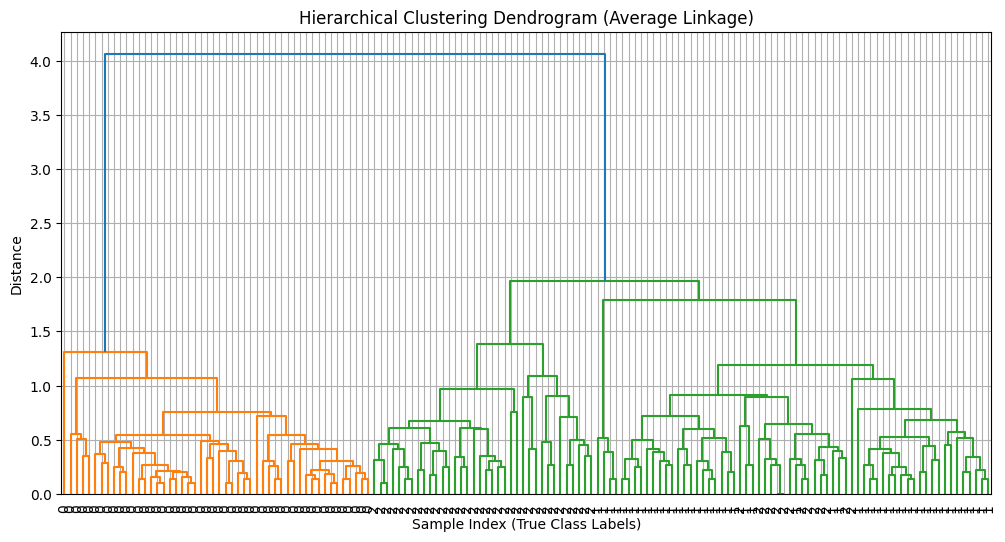

In [8]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from scipy.cluster.hierarchy import dendrogram, linkage

# Step 1: Load the Iris dataset
iris = load_iris()
X = iris.data
labels = iris.target
feature_names = iris.feature_names

# Step 2: Perform hierarchical clustering with average linkage
linked = linkage(X, method='average')

# Step 3: Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linked,
           labels=labels,
           leaf_rotation=90,
           leaf_font_size=10,
           color_threshold=0.7 * max(linked[:, 2]))  # optional: color threshold for clusters

plt.title("Hierarchical Clustering Dendrogram (Average Linkage)")
plt.xlabel("Sample Index (True Class Labels)")
plt.ylabel("Distance")
plt.grid(True)
plt.show()


31. Generate synthetic data with overlapping clusters using make_blobs, then apply K-Means and visualize with
decision boundaries.

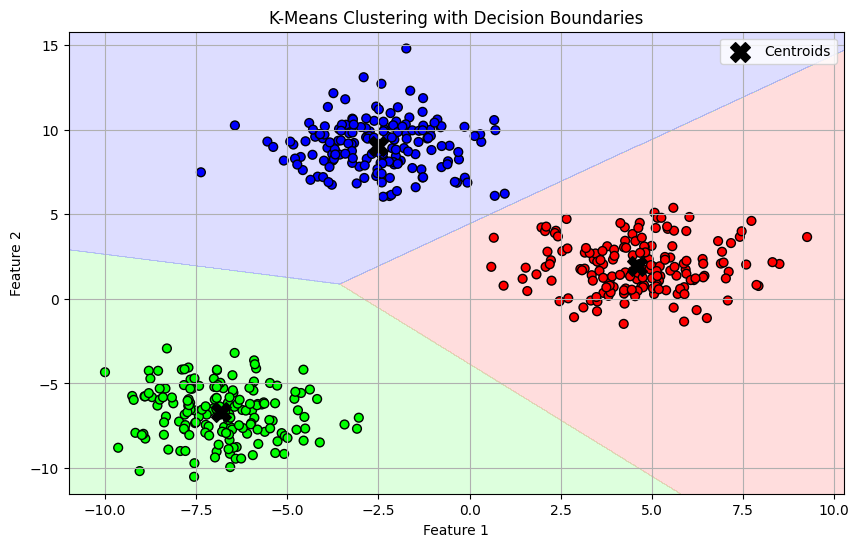

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from matplotlib.colors import ListedColormap

# Step 1: Generate synthetic data with overlapping clusters
X, y_true = make_blobs(n_samples=500, centers=3, cluster_std=1.5, random_state=42)

# Step 2: Apply K-Means
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(X)
labels = kmeans.predict(X)
centroids = kmeans.cluster_centers_

# Step 3: Create meshgrid for decision boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
grid = np.c_[xx.ravel(), yy.ravel()]
Z = kmeans.predict(grid)
Z = Z.reshape(xx.shape)

# Step 4: Plot decision boundaries and clusters
plt.figure(figsize=(10, 6))
cmap_background = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_clusters = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

plt.contourf(xx, yy, Z, cmap=cmap_background, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap=cmap_clusters, edgecolor='k', s=40)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, c='black', label='Centroids')

plt.title("K-Means Clustering with Decision Boundaries")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()


32. Load the Digits dataset and apply DBSCAN after reducing dimensions with t-SNE. Visualize the results.

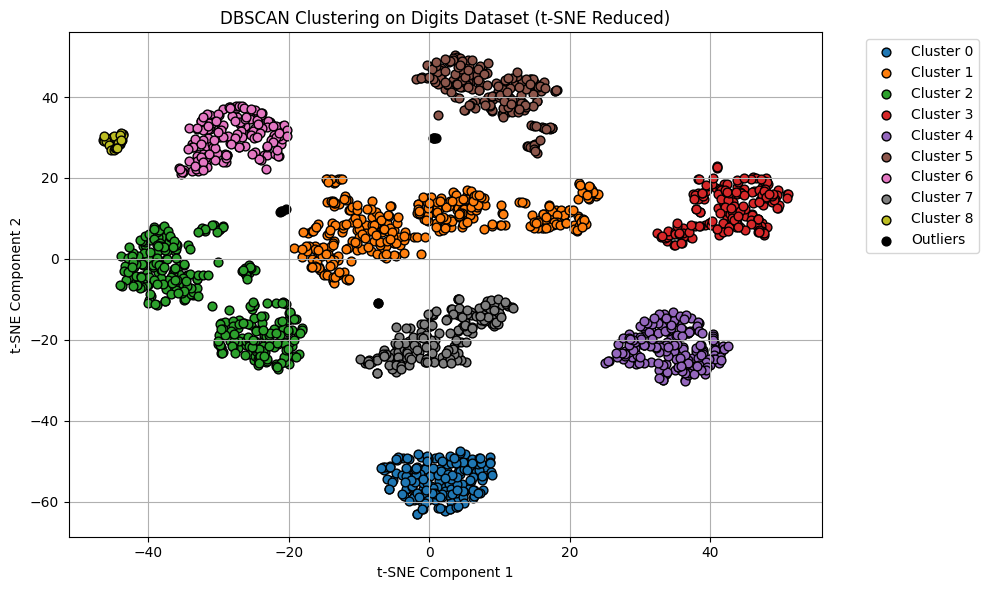

In [10]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
import numpy as np

# Step 1: Load the Digits dataset
digits = load_digits()
X = digits.data
y_true = digits.target

# Step 2: Reduce dimensions using t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, init='pca')
X_tsne = tsne.fit_transform(X)

# Step 3: Apply DBSCAN
dbscan = DBSCAN(eps=5, min_samples=5)
labels = dbscan.fit_predict(X_tsne)

# Step 4: Visualize results
plt.figure(figsize=(10, 6))
unique_labels = set(labels)
colors = plt.cm.tab10(np.linspace(0, 1, len(unique_labels)))

for k, col in zip(unique_labels, colors):
    class_mask = (labels == k)
    if k == -1:
        # Black for noise
        col = [0, 0, 0, 1]
        label_name = "Outliers"
    else:
        label_name = f"Cluster {k}"

    plt.scatter(X_tsne[class_mask, 0], X_tsne[class_mask, 1],
                c=[col], label=label_name, edgecolor='k', s=40)

plt.title("DBSCAN Clustering on Digits Dataset (t-SNE Reduced)")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.legend(loc="best", bbox_to_anchor=(1.05, 1))
plt.grid(True)
plt.tight_layout()
plt.show()


33. Generate synthetic data using make_blobs and apply Agglomerative Clustering with complete linkage. Plot
the result

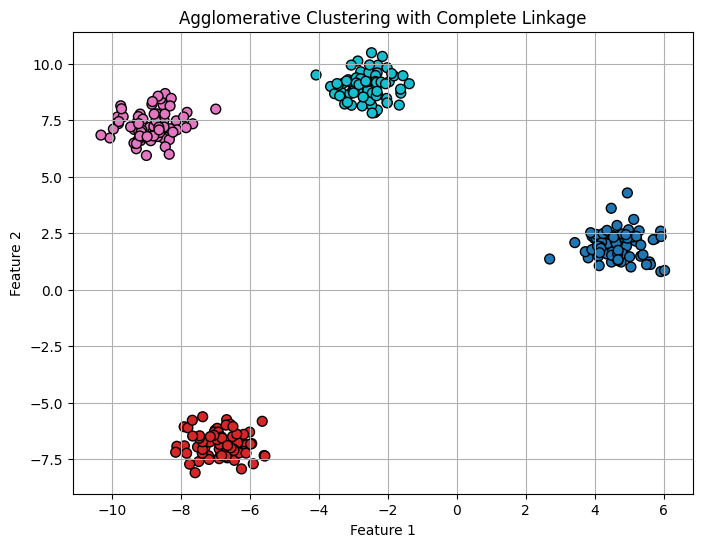

In [11]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering

# Step 1: Generate synthetic data
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=42)

# Step 2: Apply Agglomerative Clustering with complete linkage
agglo = AgglomerativeClustering(n_clusters=4, linkage='complete')
labels = agglo.fit_predict(X)

# Step 3: Plot the results
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='tab10', s=50, edgecolor='k')
plt.title("Agglomerative Clustering with Complete Linkage")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()


34. Load the Breast Cancer dataset and compare inertia values for K = 2 to 6 using K-Means. Show results in a
line plot.

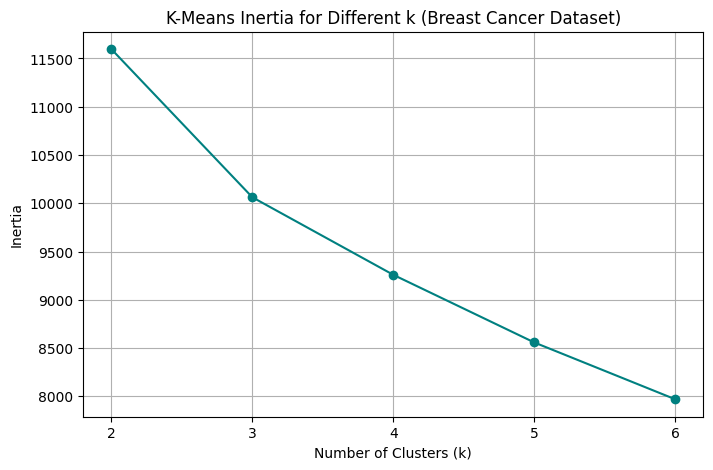

In [12]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Step 1: Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data

# Step 2: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Calculate inertia values for K = 2 to 6
k_values = range(2, 7)
inertia_values = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia_values.append(kmeans.inertia_)

# Step 4: Plot the inertia values
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia_values, marker='o', linestyle='-', color='teal')
plt.title('K-Means Inertia for Different k (Breast Cancer Dataset)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.xticks(k_values)
plt.show()


35. Generate synthetic concentric circles using make_circles and cluster using Agglomerative Clustering with
single linkage.

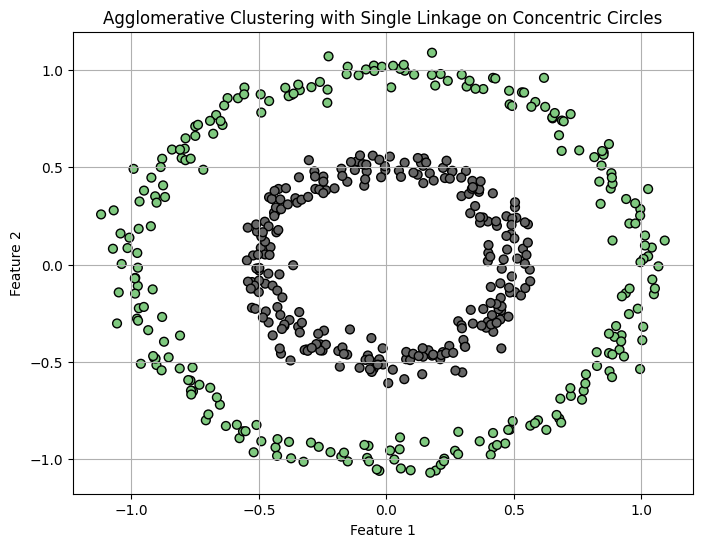

In [13]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.cluster import AgglomerativeClustering

# Step 1: Generate synthetic concentric circles
X, y_true = make_circles(n_samples=500, factor=0.5, noise=0.05, random_state=0)

# Step 2: Apply Agglomerative Clustering with single linkage
agglo = AgglomerativeClustering(n_clusters=2, linkage='single')
labels = agglo.fit_predict(X)

# Step 3: Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='Accent', s=40, edgecolor='k')
plt.title("Agglomerative Clustering with Single Linkage on Concentric Circles")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()


36. Use the Wine dataset, apply DBSCAN after scaling the data, and count the number of clusters (excluding
noise6.


In [14]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np

# Step 1: Load the Wine dataset
data = load_wine()
X = data.data

# Step 2: Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Apply DBSCAN
dbscan = DBSCAN(eps=1.2, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

# Step 4: Count the number of clusters (excluding noise)
unique_labels = set(labels)
n_clusters = len(unique_labels - {-1})  # remove noise label (-1)

print(f"Number of clusters found (excluding noise): {n_clusters}")


Number of clusters found (excluding noise): 0


37. Generate synthetic data with make_blobs and apply KMeans. Then plot the cluster centers on top of the
data points.

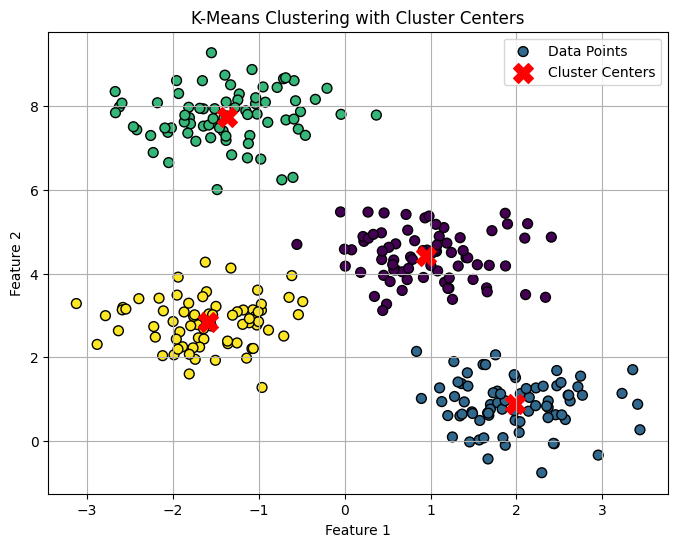

In [15]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Step 1: Generate synthetic data
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=0)

# Step 2: Apply K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=0, n_init=10)
kmeans.fit(X)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# Step 3: Plot data points and cluster centers
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, edgecolor='k', label='Data Points')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='X', label='Cluster Centers')

plt.title("K-Means Clustering with Cluster Centers")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()


38. Load the Iris dataset, cluster with DBSCAN, and print how many samples were identified as noise

In [17]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np

# Step 1: Load the Iris dataset
iris = load_iris()
X = iris.data

# Step 2: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Apply DBSCAN
dbscan = DBSCAN(eps=0.6, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

# Step 4: Count and print number of noise samples
n_noise = np.sum(labels == -1)
print(f"Number of noise samples identified by DBSCAN: {n_noise}")


Number of noise samples identified by DBSCAN: 26


39. Generate synthetic non-linearly separable data using make_moons, apply K-Means, and visualize the
clustering result.

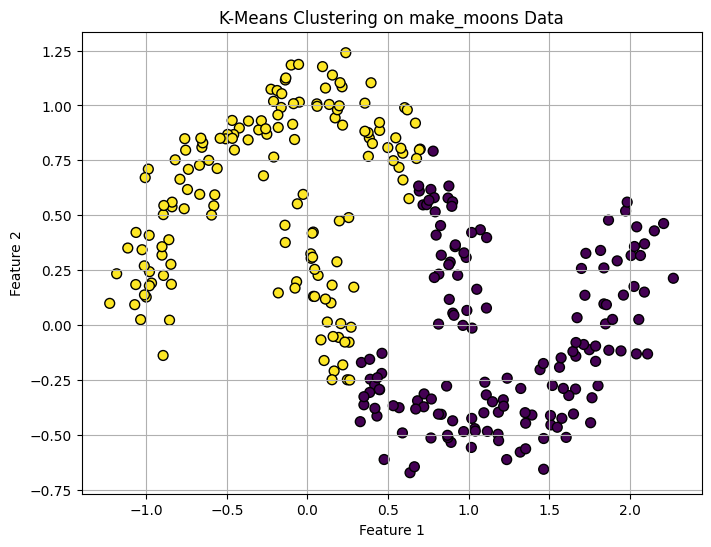

In [18]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans

# Step 1: Generate synthetic non-linear data
X, y_true = make_moons(n_samples=300, noise=0.1, random_state=42)

# Step 2: Apply K-Means clustering
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
labels = kmeans.fit_predict(X)

# Step 3: Visualize clustering result
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, edgecolor='k')
plt.title("K-Means Clustering on make_moons Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()


40.  Load the Digits dataset, apply PCA to reduce to 3 components, then use KMeans and visualize with a 3D
scatter plot

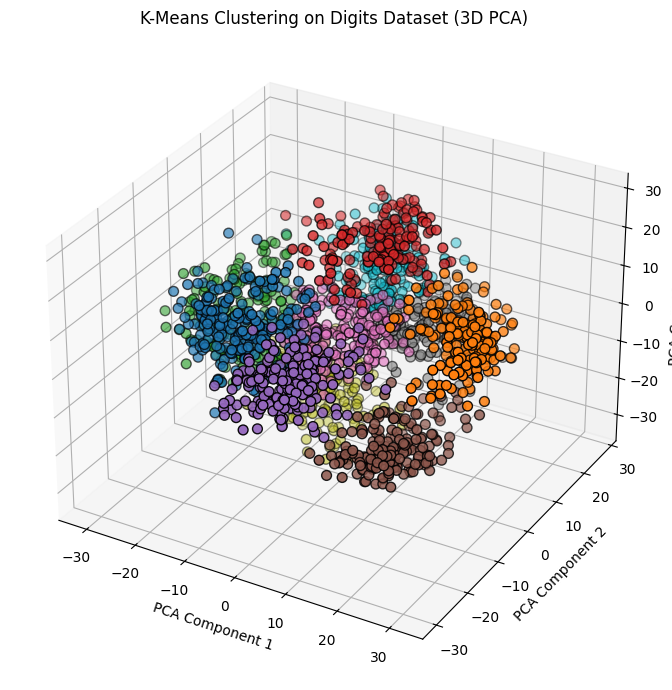

In [19]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Step 1: Load the Digits dataset
digits = load_digits()
X = digits.data
y_true = digits.target

# Step 2: Reduce to 3D using PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# Step 3: Apply KMeans clustering
kmeans = KMeans(n_clusters=10, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_pca)

# Step 4: 3D Scatter Plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2],
                     c=labels, cmap='tab10', s=50, edgecolor='k')

ax.set_title("K-Means Clustering on Digits Dataset (3D PCA)")
ax.set_xlabel("PCA Component 1")
ax.set_ylabel("PCA Component 2")
ax.set_zlabel("PCA Component 3")

plt.tight_layout()
plt.show()


41. Generate synthetic blobs with 5 centers and apply KMeans. Then use silhouette_score to evaluate the
clustering.

Silhouette Score for KMeans with 5 clusters: 0.799


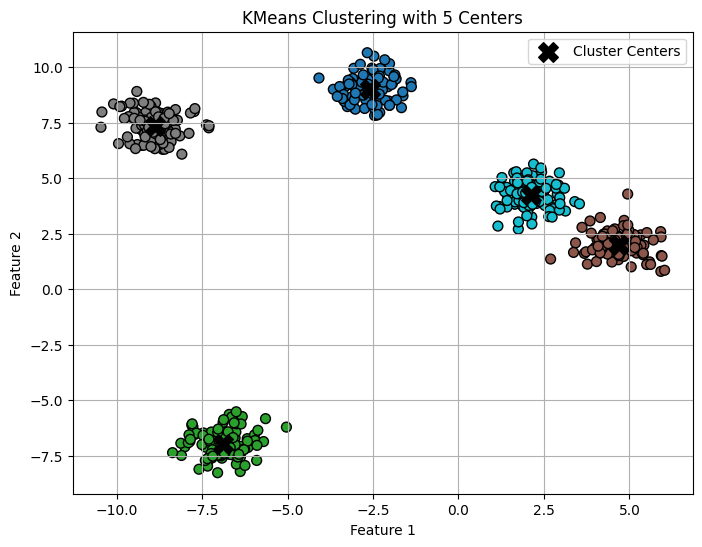

In [20]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Step 1: Generate synthetic blobs with 5 centers
X, y_true = make_blobs(n_samples=500, centers=5, cluster_std=0.6, random_state=42)

# Step 2: Apply KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
labels = kmeans.fit_predict(X)

# Step 3: Evaluate clustering with silhouette score
score = silhouette_score(X, labels)
print(f"Silhouette Score for KMeans with 5 clusters: {score:.3f}")

# Step 4: Visualize the clustering
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='tab10', s=50, edgecolor='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            c='black', s=200, marker='X', label='Cluster Centers')
plt.title("KMeans Clustering with 5 Centers")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()


42. Load the Breast Cancer dataset, reduce dimensionality using PCA, and apply Agglomerative Clustering.
Visualize in 2D

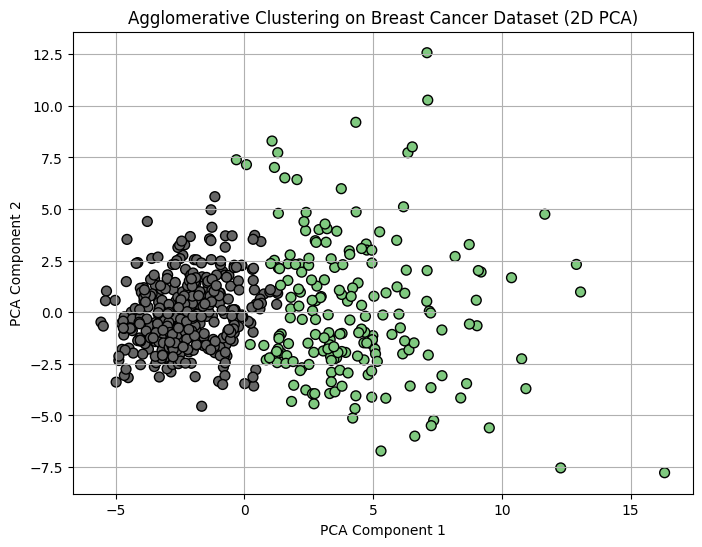

In [21]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering

# Step 1: Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data

# Step 2: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Reduce dimensionality with PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Step 4: Apply Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=2, linkage='ward')
labels = agglo.fit_predict(X_pca)

# Step 5: Visualize the results
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='Accent', edgecolor='k', s=50)
plt.title("Agglomerative Clustering on Breast Cancer Dataset (2D PCA)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()


43. Generate noisy circular data using make_circles and visualize clustering results from KMeans and DBSCAN
side-by-side

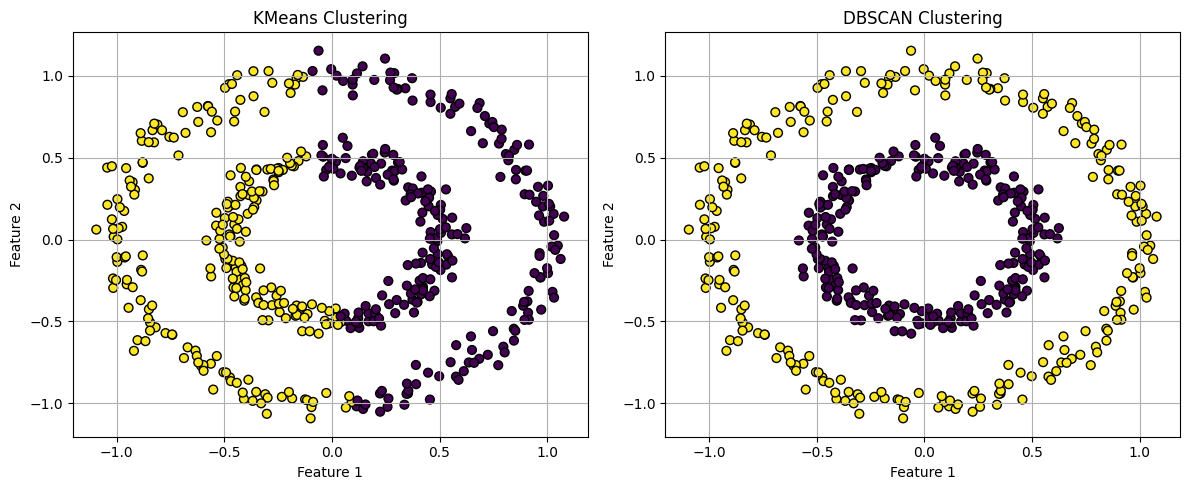

In [22]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.cluster import KMeans, DBSCAN

# Step 1: Generate noisy circular data
X, y_true = make_circles(n_samples=500, factor=0.5, noise=0.05, random_state=42)

# Step 2: Apply KMeans
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X)

# Step 3: Apply DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)

# Step 4: Visualize the results side-by-side
plt.figure(figsize=(12, 5))

# KMeans Plot
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis', s=40, edgecolor='k')
plt.title("KMeans Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)

# DBSCAN Plot
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=dbscan_labels, cmap='viridis', s=40, edgecolor='k')
plt.title("DBSCAN Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)

plt.tight_layout()
plt.show()


44. Load the Iris dataset and plot the Silhouette Coefficient for each sample after KMeans clustering.

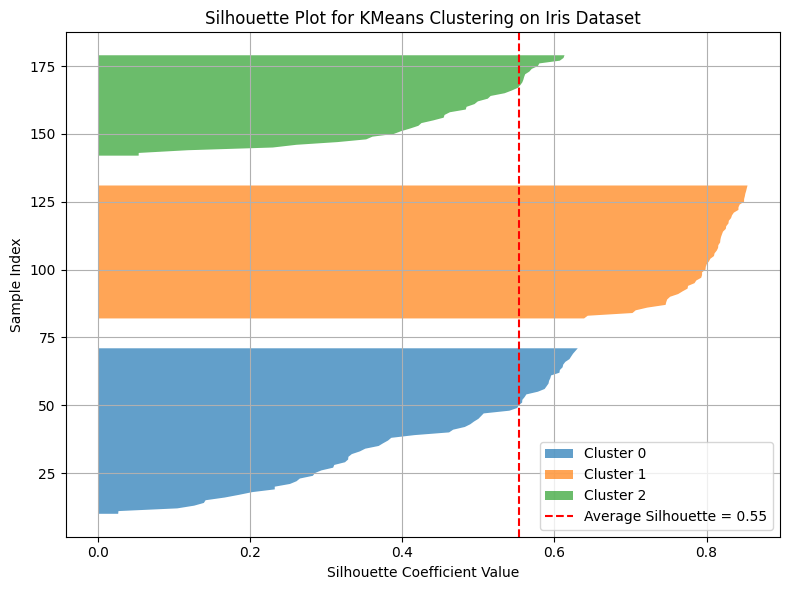

In [23]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import numpy as np

# Step 1: Load the Iris dataset
iris = load_iris()
X = iris.data

# Step 2: Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
labels = kmeans.fit_predict(X)

# Step 3: Compute Silhouette Coefficient for each sample
silhouette_vals = silhouette_samples(X, labels)
avg_silhouette = silhouette_score(X, labels)

# Step 4: Plot Silhouette Coefficients
plt.figure(figsize=(8, 6))
y_lower = 10
for i in np.unique(labels):
    ith_silhouette_vals = silhouette_vals[labels == i]
    ith_silhouette_vals.sort()
    size_cluster_i = ith_silhouette_vals.shape[0]
    y_upper = y_lower + size_cluster_i

    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_silhouette_vals,
                      alpha=0.7, label=f'Cluster {i}')
    y_lower = y_upper + 10

plt.axvline(x=avg_silhouette, color="red", linestyle="--", label=f'Average Silhouette = {avg_silhouette:.2f}')
plt.xlabel("Silhouette Coefficient Value")
plt.ylabel("Sample Index")
plt.title("Silhouette Plot for KMeans Clustering on Iris Dataset")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


45. Generate synthetic data using make_blobs and apply Agglomerative Clustering with 'average' linkage.
Visualize clusters.

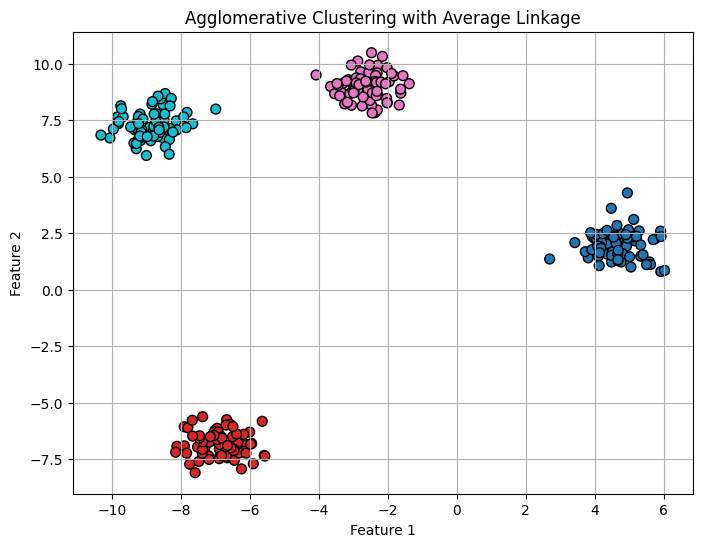

In [24]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering

# Step 1: Generate synthetic data
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=42)

# Step 2: Apply Agglomerative Clustering with 'average' linkage
agglo = AgglomerativeClustering(n_clusters=4, linkage='average')
labels = agglo.fit_predict(X)

# Step 3: Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='tab10', s=50, edgecolor='k')
plt.title("Agglomerative Clustering with Average Linkage")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()


46. Load the Wine dataset, apply KMeans, and visualize the cluster assignments in a seaborn pairplot (first 4
features).

/tmp/ipython-input-25-711239618.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['Cluster'] = labels.astype(str)  # convert to string for hue


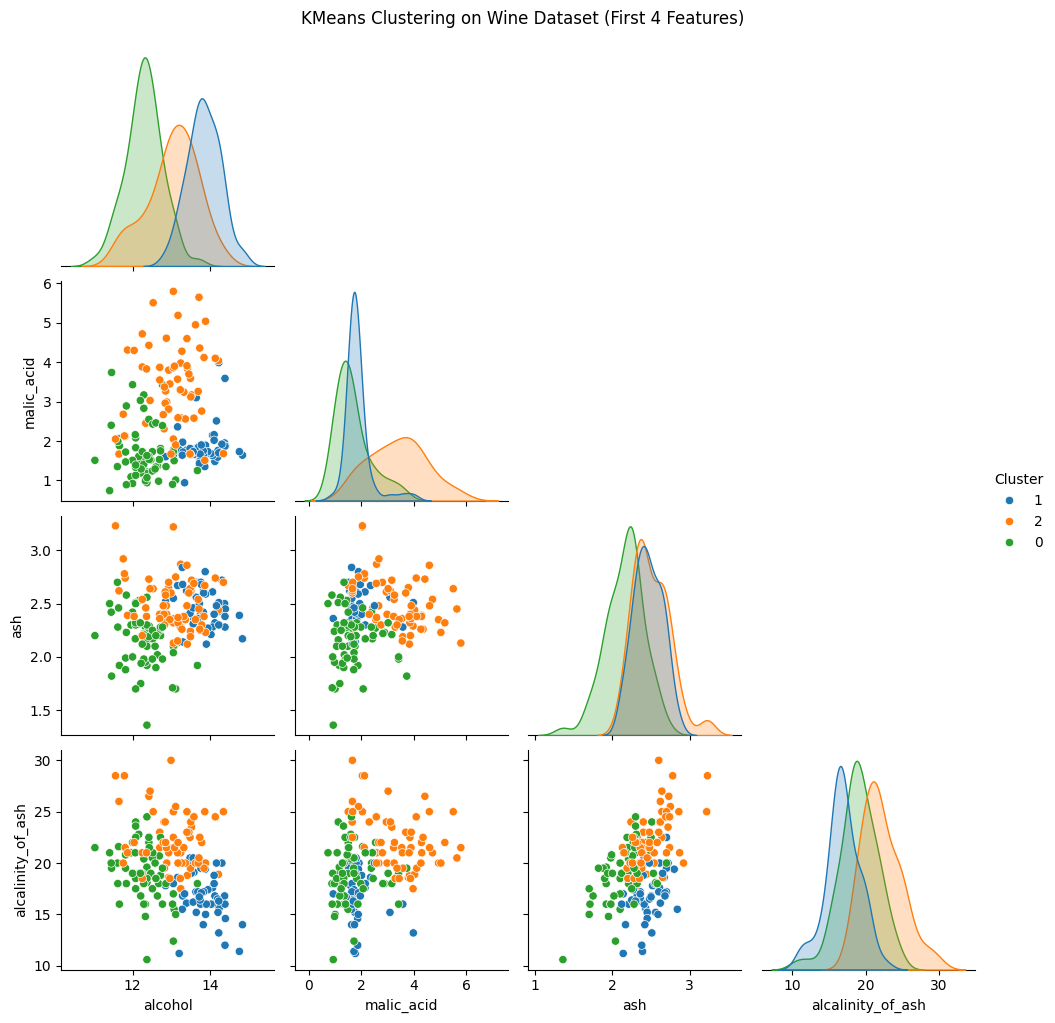

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Step 1: Load the Wine dataset
data = load_wine()
X = data.data
feature_names = data.feature_names
target_names = data.target_names

# Step 2: Convert to DataFrame and take first 4 features
df = pd.DataFrame(X, columns=feature_names)
df_subset = df.iloc[:, :4]  # first 4 features

# Step 3: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_subset)

# Step 4: Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_scaled)

# Step 5: Add cluster labels to DataFrame
df_subset['Cluster'] = labels.astype(str)  # convert to string for hue

# Step 6: Create seaborn pairplot
sns.pairplot(df_subset, hue='Cluster', palette='tab10', diag_kind='kde', corner=True)
plt.suptitle("KMeans Clustering on Wine Dataset (First 4 Features)", y=1.02)
plt.show()


47. Generate noisy blobs using make_blobs and use DBSCAN to identify both clusters and noise points. Print the
count.

In [26]:
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np

# Step 1: Generate noisy blobs
X, y_true = make_blobs(n_samples=500,
                       centers=4,
                       cluster_std=1.0,
                       random_state=42)

# Step 2: Standardize the data (important for DBSCAN)
X_scaled = StandardScaler().fit_transform(X)

# Step 3: Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

# Step 4: Count clusters and noise
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = np.sum(labels == -1)

print(f"Number of clusters found: {n_clusters}")
print(f"Number of noise points: {n_noise}")


Number of clusters found: 3
Number of noise points: 0


48. Load the Digits dataset, reduce dimensions using t-SNE, then apply Agglomerative Clustering and plot the
clusters.

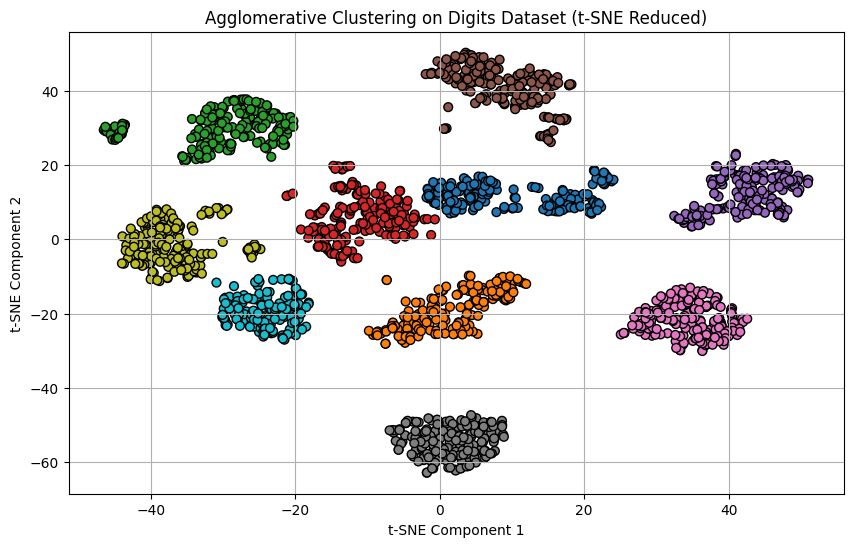

In [27]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
from sklearn.cluster import AgglomerativeClustering

# Step 1: Load the Digits dataset
digits = load_digits()
X = digits.data
y_true = digits.target

# Step 2: Reduce dimensionality with t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42, init='pca')
X_tsne = tsne.fit_transform(X)

# Step 3: Apply Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=10, linkage='ward')
labels = agglo.fit_predict(X_tsne)

# Step 4: Plot the clustered t-SNE result
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap='tab10', s=40, edgecolor='k')
plt.title("Agglomerative Clustering on Digits Dataset (t-SNE Reduced)")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.grid(True)
plt.show()
